4375_005_Team19 
Complete by: Allen(Zhijie) Zhu
ID: ZXZ200023

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(len(X_train),len(X_test))

60000 10000


90% train && 10% test sets

In [15]:
X_test = X_test[:6000]
y_test = y_test[:6000]
print(len(X_train),len(X_test))

60000 6000


In [18]:
X_train[0].shape

(28, 28)

X example: 


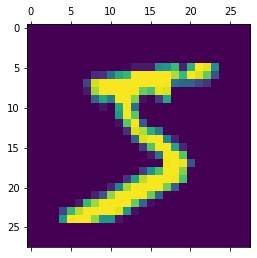

In [20]:
plt.matshow(X_train[0])

In [26]:
#Flattened X and scale
# 28 * 28 = 784

X_train_flattened = (X_train.reshape(len(X_train),784))/255
X_test_flattened = (X_test.reshape(len(X_test), 784))/255

X_test_flattened.shape



(6000, 784)

In [31]:
#implement model

model = keras.Sequential()
model.add(keras.Input(shape=(784,)))

#Hidden layer
model.add(keras.layers.Dense(100, activation='relu'))
#output layer
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flattened, y_train, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.9205
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1285 - accuracy: 0.9621
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9740
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9795
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9840
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9870


Text(69.0, 0.5, 'Truth')

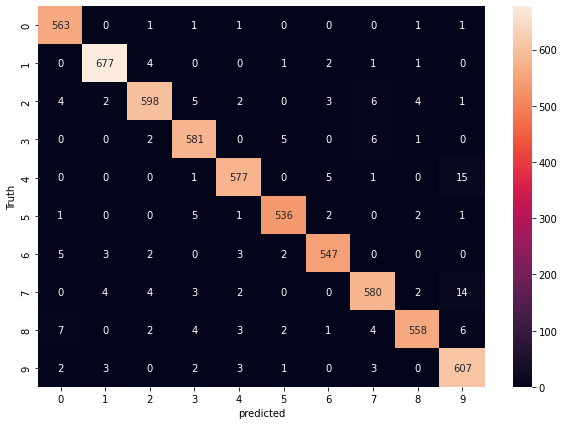

In [34]:
# plot result in confusion matrix
import seaborn as sn
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')